#https://github.com/BurcakBalOksuz?tab=following    source

# Cross-Validation


# Overfitting and Underfitting

What happens during fitting?


- model learns from the data


- model adjusts itself during that process


- adjusting parameters (hyperparameters) during that process


- trying to do a better job of understanding that data

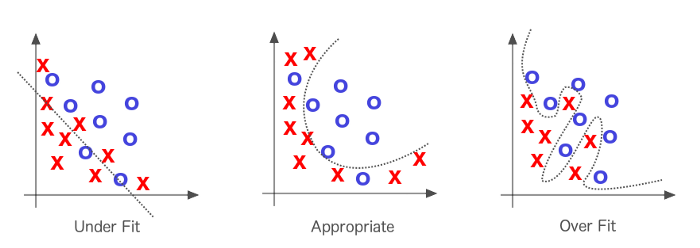

**Overfit Model**:


Intuitively, overfitting occurs when the model or the algorithm fits the data too well. 


**Overfitting** a model result in good accuracy for training data set but poor results on new data sets. Such a model is not of any use in the real world as it is **not able to predict outcomes for new cases.**


**Underfit Model**: Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough

- **How do we avoid overfitting?**


- More data points - bootstrap, synthetically oversample,


- Fewer features



- Less complex models - more parameters in a model leads to more overfitting



- Cross validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

- Let's say we want to classify Adelie and Chinstrap penguins by bill dimensions

In [2]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df = df.loc[df.species!='Gentoo']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Define x,y

In [3]:
X = df[['bill_length_mm', 'bill_depth_mm']] #features / independent variables
y = df['species'] #label / dependent variable

# Split Train & Test

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
Xtrain.shape, Xtest.shape

((171, 2), (43, 2))

# Scaling

In [5]:
#scaling in logistic regression / linear regression / many others leads to better results

sc = MinMaxScaler()
Xtrain_sc = sc.fit_transform(Xtrain)
#Xtrain_sc

# Logistic Regression

In [6]:
m = LogisticRegression(max_iter=500)
m.fit(Xtrain_sc,ytrain)

LogisticRegression(max_iter=500)

In [7]:
score = m.score(Xtrain_sc, ytrain)
f"Training score: {score:5.3f}" 

'Training score: 0.942'

Is this a good model? Are we overfitting? How can we tell?

# Cross-Validation

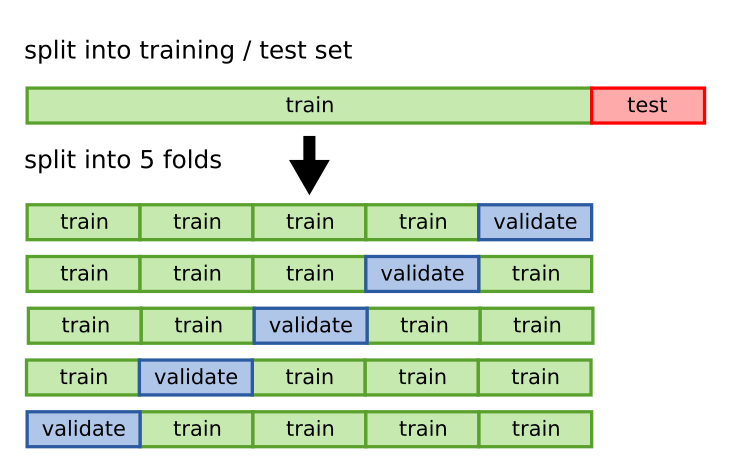

**k-Fold Cross-Validation**


- Split the data into k subsets or folds


- Reserve one fold as validation set and train on the remaining k-1


- Train and evaluate k separate models


- How do we split the data?


- indexing your data - row 0 -> row n


- sort your index


- split into 1/k portions


- if n = 100, k=5 k_1 = 1/5 = 0-19 k_2 = 2/5 = 20-39 ...


- there could be a bias in your sampling


 - - the results should reveal that
 - - way around is to radomly sample using train test split (shuffle parameter set to True)

# cross_val_score

In [8]:
scores = cross_val_score(m, Xtrain_sc, ytrain, cv=5)
scores.round(3)

array([0.886, 0.912, 0.971, 0.912, 0.882])

In [9]:
f"Mean cross-validation score: {scores.mean(): 5.3f}"

'Mean cross-validation score:  0.912'

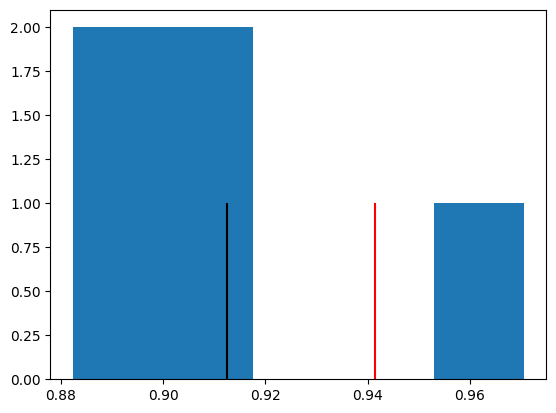

In [10]:
plt.hist(scores, bins=5) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='black')
plt.vlines(score,ymin=0,ymax=1, color='red') # this is the model score

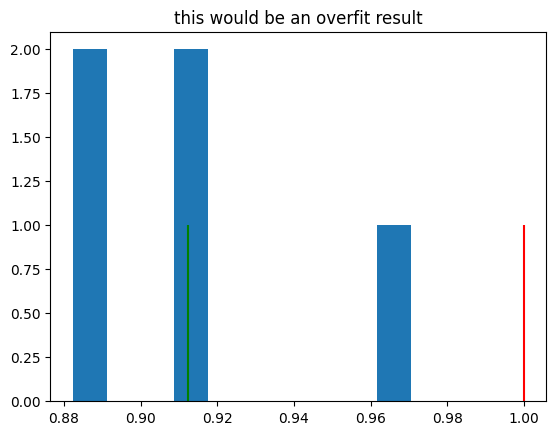

In [11]:
plt.hist(scores, bins=10) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='green')
plt.title('this would be an overfit result')
plt.vlines(1,ymin=0,ymax=1, color='red')#hypotypical 

**Interpretation of results:**



- If training score >> mean(validation_scores), you might be overfitting!




- If training score << mean(validation_scores), you might be underfitting!




- how much above determines how much you think you fear you're overfitting




- If there is high variation in the validation scores, then you have high sampling bias!




- If you do have high sampling bias (i.e. large variation in validation scores,
            
            
            
                                   
- you probably need more data, pick a different model, change hyperparameters).

- Why are we only looking at one algorithm+hyperparameter setting?



- In the real world you want to compare multiple models + hyperparameters
  How can we do this? GridSearchCV - encounter on this next week!

**Other variants**


- Shuffle-split - in case we didn't shuffle the data in train test split


- Stratified shuffle-split - it makes folds preserving the percentage of samples for each class


- Time-series split - this method allows you to split your data mindful of sequential nature of the data

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
s = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=1)

In [14]:
scores_ss = cross_val_score(estimator=m, # the model to evaluate
                                     X=Xtrain_sc,
                                     y=ytrain,
                                     scoring='accuracy', # evaluation metrics
                                    cv=s, # cross validation splitting
                           #          verbose=3
                           ) 

In [15]:
print(f'Validation accuracy scores: {np.round(scores_ss,2)}')
print(f'\nmean: {scores_ss.mean():.2}')

Validation accuracy scores: [0.94 0.94 0.86 0.97 0.91]

mean: 0.93


# Bootstrapping

- Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples.


- This process allows for the calculation of standard errors, confidence intervals, and hypothesis testing” ( Forst).

- Create 1000 subsamples of the training dataset (with replacement)


- the test dataset is the points which are not sampled


- takes longer


- gives you a confidence interval


- a confidence interval describes how much uncertainty there is with any particular statistic. Intuitively, it means that should you repeat a test where you sample from a population, X percent of the time your results will match the results you get from a population, which means you can have confidence in the results!

In [17]:
from sklearn.utils import resample
from tqdm import tqdm # progress bar

In [18]:
boots = []
split_size = int(len(Xtrain_sc)*0.75)
for i in tqdm(range(1000)):
    Xb, yb = resample(Xtrain_sc, ytrain) #bootsrapping random resample
    Xb_train = Xb[:split_size] #train data
    yb_train = yb[:split_size]
    Xb_test = Xb[split_size:] # validation data
    yb_test = yb[split_size:]
    m.fit(Xb_train, yb_train) #fit on the train data
    score = m.score(Xb_test, yb_test) # score on the val data
    boots.append(score) # save the score
boots.sort() # sort scores from best to worst - required for my confidence interval levels

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

  5%|███▋                                                                           | 46/1000 [00:00<00:02, 458.88it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 10%|███████▌                                                                       | 95/1000 [00:00<00:01, 470.39it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 15%|███████████▌                                                                  | 149/1000 [00:00<00:01, 501.01it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 20%|███████████████▊                                                              | 203/1000 [00:00<00:01, 515.59it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 26%|████████████████████                                                          | 258/1000 [00:00<00:01, 525.72it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 31%|████████████████████████▍                                                     | 313/1000 [00:00<00:01, 533.46it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

 37%|████████████████████████████▉                                                 | 371/1000 [00:00<00:01, 547.96it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 58%|█████████████████████████████████████████████▌                                | 584/1000 [00:01<00:00, 496.13it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 63%|█████████████████████████████████████████████████▍                            | 634/1000 [00:01<00:00, 477.14it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 68%|█████████████████████████████████████████████████████▎                        | 683/1000 [00:01<00:00, 420.47it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 73%|████████████████████████████████████████████████████████▋                     | 727/1000 [00:01<00:00, 410.67it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 82%|████████████████████████████████████████████████████████████████▏             | 823/1000 [00:01<00:00, 443.62it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 87%|███████████████████████████████████████████████████████████████████▉          | 871/1000 [00:01<00:00, 452.40it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 92%|███████████████████████████████████████████████████████████████████████▌      | 917/1000 [00:01<00:00, 439.23it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

 96%|███████████████████████████████████████████████████████████████████████████   | 962/1000 [00:02<00:00, 437.81it/s]C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The 

C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_train = yb[:split_size]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yb_test = yb[split_size:]
C:\Users\tmost\AppData\Local\Temp\ipykernel_27788\4094802473.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *labe

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 471.86it/s]


In [19]:
ci80 = boots[100:-100]
print(f"80% confidence interval: {ci80[0]} -{ci80[-1]}")

80% confidence interval: 0.8372093023255814 -0.9767441860465116


In [20]:
ci90 = boots[50:-50]
print("90% confidence interval: {} - {}".format(ci90[0], ci90[-1]))

90% confidence interval: 0.813953488372093 - 0.9767441860465116


In [21]:

ci99 = boots[5:-5]
print("99% confidence interval: {} - {}".format(ci99[0], ci99[-1]))

99% confidence interval: 0.7209302325581395 - 1.0


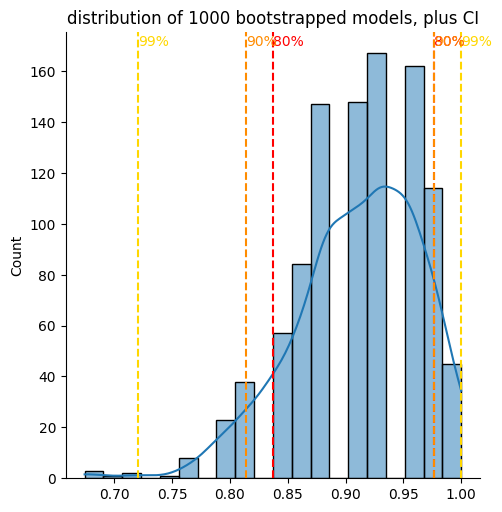

In [22]:
# Plot distribution of bootstrapped models

import seaborn as sns
sns.displot(boots, bins=20, kde=True)
plt.axvline(x=ci80[0], color = 'red', linestyle = '--')
plt.axvline(x=ci80[-1], color = 'red', linestyle = '--')
plt.axvline(x=ci90[0], color = 'darkorange', linestyle = '--')
plt.axvline(x=ci90[-1], color = 'darkorange', linestyle = '--')
plt.axvline(x=ci99[0], color = 'gold', linestyle = '--')
plt.axvline(x=ci99[-1], color = 'gold', linestyle = '--')
plt.text(s = '80%', x=ci80[0], y = 170, color = 'red')
plt.text(s = '90%', x=ci90[0], y = 170, color = 'darkorange')
plt.text(s = '99%', x=ci99[0], y = 170, color = 'gold')
plt.text(s = '80%', x=ci80[-1], y = 170, color = 'red')
plt.text(s = '90%', x=ci90[-1], y = 170, color = 'darkorange')
plt.text(s = '99%', x=ci99[-1], y = 170, color = 'gold')
plt.title('distribution of 1000 bootstrapped models, plus CI')
None

Next Steps


Complete the challenges in the course materials

Resources


- Some examples of how to spot Data Leakage on Kaggle


https://www.kaggle.com/code/alexisbcook/data-leakage/tutorial

- Some exercises on Kaggle to think about Data Leakage


- Which ML models require Feature Scaling?

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

# Evaluating Classifiers


## How can we evaluate our results from a classifier model?


### Warmup:

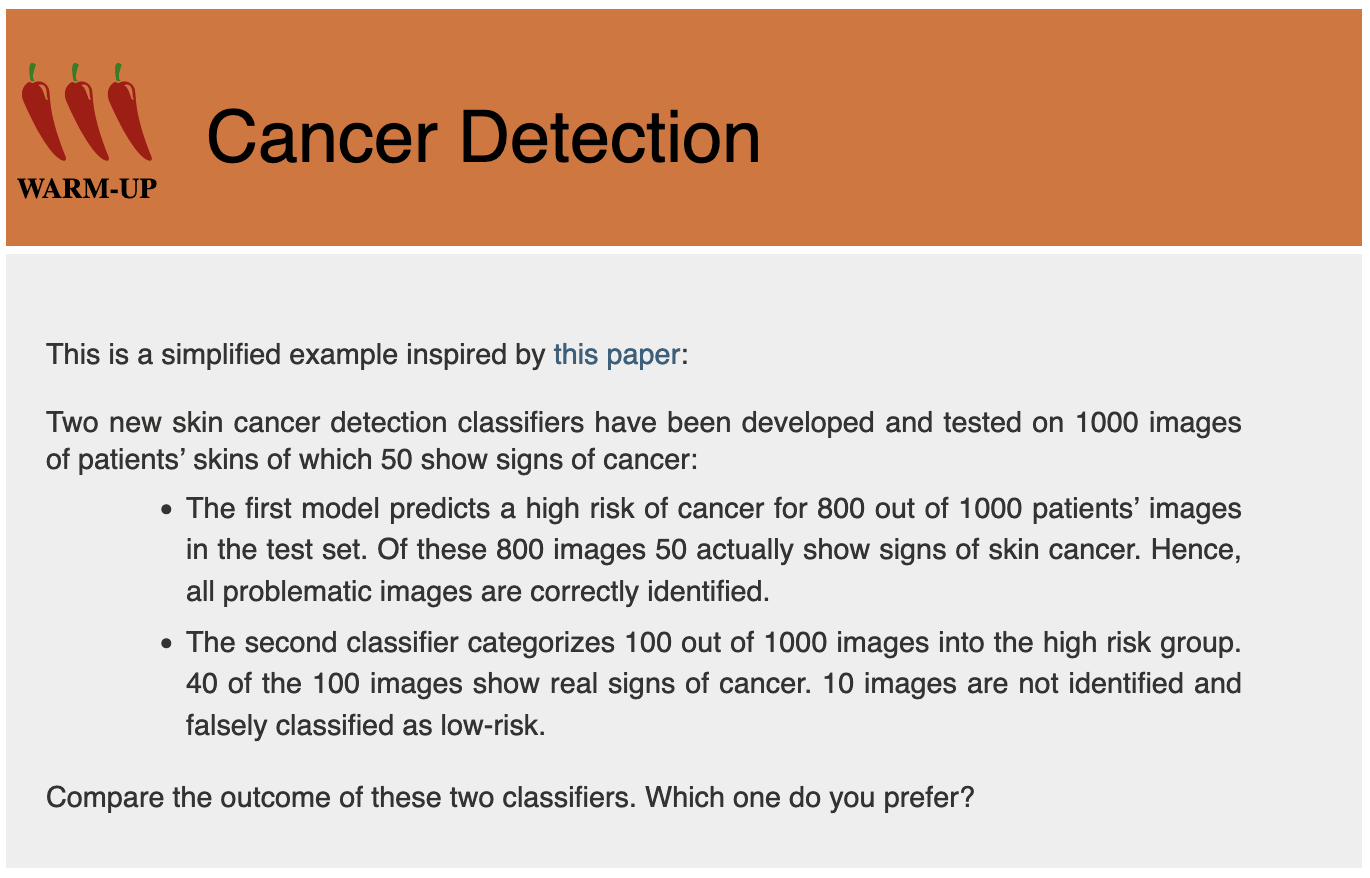


## Discussion:

- 1000 patients in total


- 50 of them show signs of cancer


- Depends if we want to focus on saving lives or on cutting costs to re-evaluate the 800 positive classifications

## Model 1:

- If we tell 800 people that they probably have cancer, this is upsetting


- We catch all the real cancer cases


## Model 2:

- We need to re-test many people


- The 10 which were mis-labellec could be early stage cancer (harder to detect) - would need follow up appointments


- If the use case is cancer detection, model 1 seems like the better model

# Model 1:

In [24]:
TP = 50 #model guesses cancer, and in reality it is cancer
TN = 200 #model guesses it is NOT cancer, and in reality it is NOT cancer (1000-800)
FP = 750 #model guesses cancer, but in reality it is NOT cancer (800-50)
FN = 0 #model guesses it is NOT cancer, but in reality it is cancer

- Accuracy - how many predictions are correct?

In [25]:
# Accuracy of the model: How many of all our predictions are correct?
m1_accuracy = (TP+TN)/(TP+TN+FP+FN)
m1_accuracy

0.25

- The accuracy of this model is terrible but it does manage to correctly label all positive cancer cases. What other metrics could we use to reflect this?

**Recall aka. Sensitivity**

- if we are only interested in catching all the true positive cases


- a false positive is not as bad as a false negative and we want to reflect this

In [26]:
m1_recall= TP / (TP + FN)
m1_recall

1.0

- The recall score is 1 because this model doesn't miss any of the true cancer cases.

**Precision aka. Specificity**


- if the model guesses a positive case, it should be very sure that it is in fact positive.


- eg. in spam detection: it's worse if an important email is falsely categorized as spam than the other way around.

In [28]:
m1_precision= TP / (TP + FP)
m1_precision

0.0625

- The precision score is very low as the model miscategorises a lot of true negatives as cancer

# Model 2

In [29]:
TP = 40 #model guesses cancer, and in reality it is cancer
TN = 890 #model guesses it's NOT cancer, and in reality it is NOT cancer (1000 - (100 + 10)), or (900 - 10)
FP = 60 #model guesses cancer, but in reality it is NOT cancer (100 - 60)
FN = 10 #model guesses it is NOT cancer, but in reality it is cancer

In [30]:
m2_accuracy = (TP+TN)/(TP+TN+FP+FN)
m2_accuracy

0.93

In [31]:
m2_recall= TP / (TP + FN)
m2_recall

0.8

In [32]:
m2_precision = TP / (TP + FP)
m2_precision

0.4

- As we have seen, accuracy loses a lot of its value as an evaluation metric if we are interested in minimising one type of error over another.



- Another issue with accuracy is that if we have an imbalanced dataset, it becomes increasingly useless.

**Optimistic Model 3: nobody has cancer**

In [35]:
#We predict that it's not cancer in every case

#remember: 950 do not have cancer, and 50 do.
#"positive" = cancer


TP =  0 #model guesses cancer, and in reality it is cancer
TN =  950 #model guesses NOT cancer, and in reality it is NOT cancer 
FP = 0 #model guesses cancer, but in reality it is NOT cancer 
FN = 50 #model guesses NOT cancer, but in reality it is cancer

In [34]:
m3_accuracy = (TP+TN)/(TP+TN+FP+FN)
m3_accuracy 

0.95

- This model has a higher accuracy score than Model 2 which correctly identified 40 out of 50 cancer cases!



- Summary/ Recap of Evaluation Metrics
- We can plot a confusion matrix of our results which looks like this:

**Accuracy**


- Accuracy measures how often the model is correct.

- How to Calculate


(True Positive + True Negative) / Total Predictions

**Precision**


- precision of the positives predicted, what percentage is truly positive?



- How to Calculate
  True Positive / (True Positive + False Positive)


**Sensitivity (Recall)**



- Of all the positive cases, what percentage are predicted positive?


- Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.


- This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).

- How to Calculate
 True Positive / (True Positive + False Negative)

**pecificity**


- How well the model is at prediciting negative results?


- Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.


- How to Calculate
- True Negative / (True Negative + False Positive)

**Example**


We will look at a dataset of breast cancer data included with sklearn:

In [36]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1.  Get data

In [40]:
cancer_data = load_breast_cancer(as_frame=True)

In [43]:
X = pd.DataFrame(cancer_data.data)
y = cancer_data.target

In [44]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [49]:
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [47]:
X.shape, y.shape

((569, 30), (569,))

In [48]:
# percentage of positives in the dataset

sum(y == 1) / len(y) 

0.6274165202108963

# 2. Spilit Data

In [50]:
# train/test split and stratify by the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.4, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

# 3. Train Model

In [51]:
m = LogisticRegression(max_iter=3000) #create a model
m.fit(X_train,y_train) #train the model

LogisticRegression(max_iter=3000)

# 4. Evaluate Model

In [53]:
# train accuracy
m.score(X_train,y_train)  

0.9618768328445748

In [54]:
# Test accuracy
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred) 

0.956140350877193

- Train and test accuracy are **quite close** so we don't seem to have too much overfitting



- Overfitting happens when the accuracy in the training set in higher and the accuracy in the test set is lower 



- Train accuracy: 99.4%
  Test accuracy: 71.4%

- We call it as over-fitting,If the accuracy of training data is abnormally higher (greater than 95%) and accuracy of test data is very low (less than 65%). In our case,both training and testing accuracy are almost similar.So there is no over-fitting. 
  Try for more test data and check whether the accuracy is decreasing or not.You can also try to improve the model by

- Trying different algorithms


-  Increasing the size of train data


- Trying K-fold cross validation


- Hyper parameter tuning


- Using Regularization methods


- Standardizing feature variables

In [55]:
# Precision and Recall

precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(f'Precision = {precision:.4f} \nRecall = {recall:.4f}')

Precision = 0.9463 
Recall = 0.9860


In [56]:
# Classification report summarises all the metrics for each class:
# The support is the number of occurrences of each class in y_true.

print(classification_report(y_test, ypred, target_names=['not cancer', 'cancer']))

# Can also be returned as a dictionary using the output_dict parameter 

              precision    recall  f1-score   support

  not cancer       0.97      0.91      0.94        85
      cancer       0.95      0.99      0.97       143

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



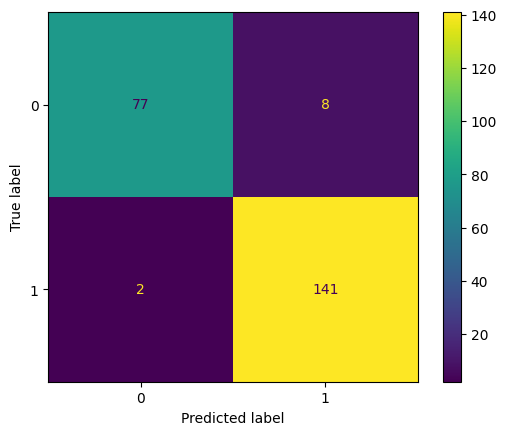

In [57]:
# Sklearn has an inbuilt Confusion Matrix Display class:
ConfusionMatrixDisplay.from_predictions(y_test, ypred, normalize=None)

Text(0.5, 1.0, 'Confusion Matrix')

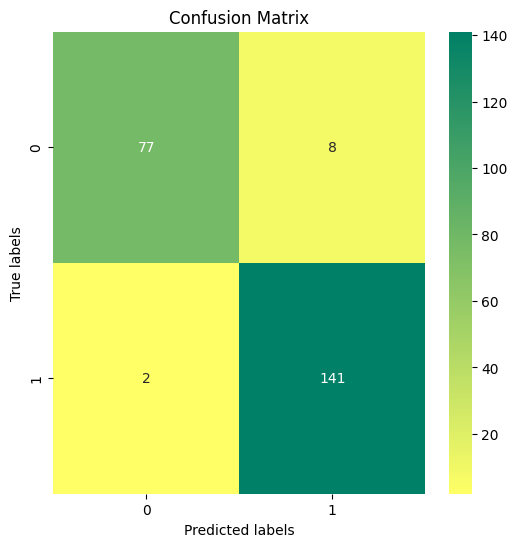

In [58]:
# Confusion Matrix using Seaborn Heatmap
conf = confusion_matrix(y_test,ypred)

#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, cmap='summer_r', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

(Bonus) Receiver Operator Curve (ROC) and Area Under the Curve (AUC)
ROC plots the false positive rate (1-Precision) (x axis) against the true positive rate (Recall) (y axis) for every classification threshold.



AUC is the area under ROC and is a useful measure when comparing classifiers as we can plot their ROC on the same graph. Ideally AUC is as close to 1 as possible so the model with the highest AUC is a good one to choose. The ROC can help us choose which classification threshold we want to use for our chosen model.



- The output of our Logistic Regression is actually an array probabilities rather than binary classes

In [59]:
test_probs= m.predict_proba(X_test)
test_probs[:4]

array([[1.16829010e-01, 8.83170990e-01],
       [3.77396316e-01, 6.22603684e-01],
       [6.54344541e-04, 9.99345655e-01],
       [1.89842405e-03, 9.98101576e-01]])

The default setting is to classify datapoints around the threshold 0.5 but this doesn't have to be the case! We can compare all possible thresholds to find one that suits our needs in terms of precision/recall. Instead of generating many confusion matrices and trying to compare them, we can plot the TP vs FP rates as a curve:

In [60]:
roc_curve(y_test, test_probs[:,1])

(array([0.        , 0.        , 0.        , 0.01176471, 0.01176471,
        0.02352941, 0.02352941, 0.03529412, 0.03529412, 0.04705882,
        0.04705882, 0.07058824, 0.07058824, 0.08235294, 0.08235294,
        0.10588235, 0.10588235, 0.12941176, 0.12941176, 1.        ]),
 array([0.        , 0.00699301, 0.57342657, 0.57342657, 0.87412587,
        0.87412587, 0.95804196, 0.95804196, 0.96503497, 0.96503497,
        0.97202797, 0.97202797, 0.97902098, 0.97902098, 0.98601399,
        0.98601399, 0.99300699, 0.99300699, 1.        , 1.        ]),
 array([1.99999922e+00, 9.99999216e-01, 9.91941940e-01, 9.91845836e-01,
        9.33751551e-01, 9.12886015e-01, 8.02303535e-01, 8.01216757e-01,
        7.83585791e-01, 7.79866998e-01, 7.42127819e-01, 6.89092140e-01,
        6.65284880e-01, 6.27452475e-01, 6.22603684e-01, 4.85205231e-01,
        4.57713068e-01, 3.85146577e-01, 3.43760676e-01, 9.42955637e-35]))

In [61]:
# Area under the ROC:
roc_auc_score(y_test, test_probs[:,1])

0.9911970382558618

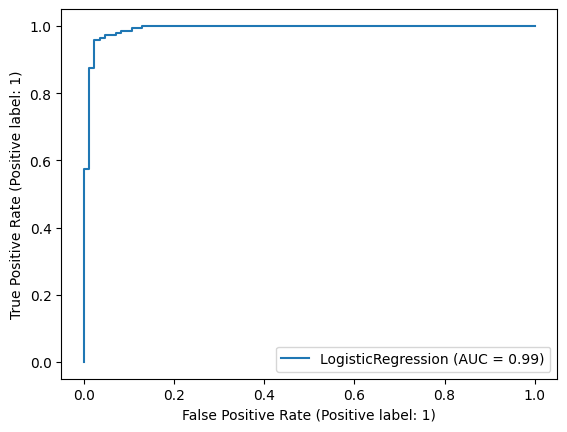

In [62]:
#Plotting the curve in sklearn: 
RocCurveDisplay.from_estimator(m, X_test, y_test)

**Baseline Models**


We always need a baseline model to compare our trained model(s) with. These can be:

A dummy model which always predicts the same outcome (eg. nobody gets cancer, everyone drowns)
the latest state-of-the-art model
human judgement
We should always compare the performance of our models to some established baselines. This is especially true for complicated machine learning solutions that require a lot of resources. When presenting a new approach we need to justify its high costs!

In [63]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_dummy=dummy_clf.predict(X_test)
# Predicts that everyone has cancer as this was the larger class.

print(classification_report(y_test, y_dummy, target_names=['not cancer', 'cancer'], zero_division=0))

              precision    recall  f1-score   support

  not cancer       0.00      0.00      0.00        85
      cancer       0.63      1.00      0.77       143

    accuracy                           0.63       228
   macro avg       0.31      0.50      0.39       228
weighted avg       0.39      0.63      0.48       228



Next Steps


Do the exercises in the course material
See if you can calculate and plot an ROC curve from scratch
Advanced! See if you can choose a classification threshold that optimises for precision and recall, generate predictions according to this threshold, and evaluate these predictions
References
Great introductory explainer of ROC and AUC